In [18]:
from dotenv import load_dotenv
from langchain_core.messages import AIMessage, HumanMessage

load_dotenv()

messages = [
AIMessage(content="You said you are researching CV models.", name="Model"),
HumanMessage(content="Yes i am.", name="Brendon"),
AIMessage(content="Great, what are you interested to know?", name="Model"),
HumanMessage(content="I'd like to know about YOLO.", name="Brendon"),
]
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

You said you are researching CV models.
================================ Human Message =================================
Name: Brendon

Yes i am.
================================== Ai Message ==================================
Name: Model

Great, what are you interested to know?
================================ Human Message =================================
Name: Brendon

I'd like to know about YOLO.


In [19]:
import os, getpass

def _set_env(var: str):
    os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

In [26]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
result = llm.invoke(messages)
type(result)

langchain_core.messages.ai.AIMessage

In [28]:
result

AIMessage(content='YOLO, which stands for "You Only Look Once," is a popular real-time object detection system. It is known for its speed and accuracy, making it suitable for various applications where real-time processing is crucial. Here’s a brief overview of its key features and concepts:\n\n1. **Unified Detection**: Unlike traditional object detection methods that perform region proposals followed by classification, YOLO treats object detection as a single regression problem, straight from image pixels to bounding box coordinates and class probabilities.\n\n2. **Single Neural Network**: YOLO uses a single convolutional neural network (CNN) to predict multiple bounding boxes and class probabilities simultaneously. This contributes to its speed advantage.\n\n3. **Grid-Based Prediction**: The image is divided into an \\( S \\times S \\) grid. Each grid cell is responsible for predicting bounding boxes and their corresponding class probabilities. This assumes that each object’s center 

In [29]:
result.response_metadata

{'token_usage': {'completion_tokens': 499,
  'prompt_tokens': 58,
  'total_tokens': 557,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_898ac29719',
 'id': 'chatcmpl-BK34NarltTbwf4JVfyLWTJxBeGVGv',
 'finish_reason': 'stop',
 'logprobs': None}

In [30]:
def multiply(a: int, b: int) -> int:
    """
        Multiply a and b.

        Args:
              a: first int
              b: second int
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

In [32]:
tool_call = llm_with_tools.invoke([HumanMessage("What is 3 multiplied by 2", name="Brendon")])

In [33]:
tool_call.response_metadata

{'token_usage': {'completion_tokens': 18,
  'prompt_tokens': 63,
  'total_tokens': 81,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_898ac29719',
 'id': 'chatcmpl-BK37w6XBiLwPwpMPujYakHqkr3VP6',
 'finish_reason': 'tool_calls',
 'logprobs': None}

In [36]:
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pOYloIj57hf0WPKnJnzZwWMB', 'function': {'arguments': '{"a":3,"b":2}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 63, 'total_tokens': 81, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_898ac29719', 'id': 'chatcmpl-BK37w6XBiLwPwpMPujYakHqkr3VP6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-8a87a865-130f-4d26-90e8-60281264d85d-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 2}, 'id': 'call_pOYloIj57hf0WPKnJnzZwWMB', 'type': 'tool_call'}], usage_metadata={'input_tokens': 63, 'output_tokens': 18, 'total_tokens': 81, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_detail

In [37]:
# Using messages as state
from typing import TypedDict
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
    messages: list[AnyMessage]



In [38]:
from typing import Annotated
from langgraph.graph.message import add_messages
class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [39]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    """
    Has inherited field of type messages: Annotated[list[AnyMessage], add_messages]
    """
    pass

In [40]:
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
                   ]

new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

add_messages(initial_messages, new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='1b8bc224-1bc0-4f51-95f9-5e4c73c2ee33'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='51b932df-fbcb-4083-88e0-1350b41419a0'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='bc31ce35-2039-4042-8e0e-dfcc33e4d138')]

In [49]:
# Graph

from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

def tool_calling_llm(state: MessagesState):
    return {
        "messages": [llm_with_tools.invoke(state["messages"])],
    }

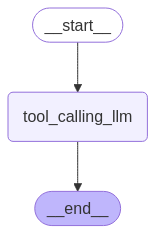

In [50]:
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [56]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 by 3")})
from pprint import pprint
pprint(messages)
print("-------------------------")
for m in messages['messages']:
    m.pretty_print()

{'messages': [HumanMessage(content='Multiply 2 by 3', additional_kwargs={}, response_metadata={}, id='5dbaba23-220c-430d-aeee-89cfac59e48d'),
              AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ZjG6pnMXwvqEtSSEkTHBmhFL', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 58, 'total_tokens': 76, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_898ac29719', 'id': 'chatcmpl-BK3aC3HHWPuR2BnT3umalPx8A8x8V', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-81418d90-dedc-4224-bfb7-fbe00ce7dbab-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_ZjG6pnMXwvqEtSSEkTHBmhFL', 'type': 'tool_call